# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [75]:
# Difference
df['Diff'] = df["Adj Close"].diff().shift(-1)

# Target variable
df['Target'] = np.sign(df['Diff'])

# Option premium (we make that in the true positive)
df['Premium'] = 0.08 * df['Adj Close']

In [76]:
df.head()

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data and build a LogReg on column 2

In [77]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [78]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])
X.head()

,VAR1
Date,
1980-12-31,0.163261
1981-01-31,0.437449
1981-02-28,-0.334994
1981-03-31,2.550820
1981-04-30,3.170655


In [79]:
y = df.loc[:"2023-09-30","Target"].copy()
df = df.loc[:"2023-09-30",].copy()

In [80]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

In [81]:
y_pred = log_reg.predict(X)

# 4.) Add columns, prediction and profits.

In [82]:
df['Prediction'] = y_pred
df.head()

,Adj Close,Diff,Target,Premium,Prediction
Date,,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431,-1.0
1981-01-31,0.097591,-0.006045,-1.0,0.007807,-1.0
1981-02-28,0.091546,-0.006909,-1.0,0.007324,-1.0
1981-03-31,0.084637,0.013386,1.0,0.006771,1.0
1981-04-30,0.098023,0.016409,1.0,0.007842,1.0


In [88]:
df['Profits'] = 0

# True Positives
df.loc[(df['Prediction'] == 1) & (df['Target'] == 1),'Profits'] = df['Premium']

# False Positives

df.loc[(df['Prediction'] == 1) & (df['Target'] == -1),'Profits'] = 100 * df['Diff'] + df['Premium']

# 5.) Plot profits over time

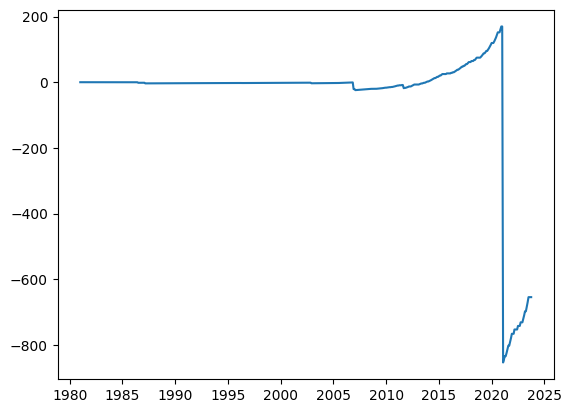

In [89]:
plt.plot(np.cumsum(df['Profits']))

# 5.5 ) How your skills from the MQE can help Mr. Liu's ventures

The MQE is all about learning data quantitative analysis, so the set of skills aligns heavily with a data driven venture as the ones Mr. Liu's ongoing. For example, the new social media 'The Arena' requires for data analysis to identify and asses the performance of new features; so my expertise could complement to a better and more informed decision-making process. In this masters degree we are also learning in querying blockchain data, which aligns exactly on how the data is published in the social network. Furthermore, we are learning predictive modeling skills to forecast user behavior, particularly we could predict how likely is an user willing to spend money acquiring the personalities, thus contributing to the company's revenue streams.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.